In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### import

In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

# 데이터 불러오기

In [ ]:
os.chdir("/content/drive/MyDrive/4-1/소캡디/code")

### 1위데이터 (winner_predict)

In [ ]:
winner_predict = pd.read_csv("./data_init/0002 YJ_STU.csv")

In [ ]:
winner_predict = winner_predict.iloc[30490:33539]
winner_predict = winner_predict.reset_index(drop=True)

In [ ]:
for i in range(1,29):
  winner_predict.rename(columns = {"F"+str(i) : "d_"+str(1941+i)}, inplace= True)

In [ ]:
for i in range(len(winner_predict)): #id 이름 바꾸기
  winner_predict["id"][i] = winner_predict["id"][i][:-16]

<ipython-input-10-8b6d5baf7fb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winner_predict["id"][i] = winner_predict["id"][i][:-16]


In [ ]:
winner_predict["cat_id"] =""
winner_predict["dept_id"] =""

In [ ]:
for i in range(len(winner_predict)): #cat_id 추가
  winner_predict["cat_id"][i] = winner_predict["id"][i][:-6]

for i in range(len(winner_predict)): #dept_id 추가
  winner_predict["dept_id"][i] = winner_predict["id"][i][:-4]

In [ ]:
winner_predict.columns

Index(['id', 'd_1942', 'd_1943', 'd_1944', 'd_1945', 'd_1946', 'd_1947',
       'd_1948', 'd_1949', 'd_1950', 'd_1951', 'd_1952', 'd_1953', 'd_1954',
       'd_1955', 'd_1956', 'd_1957', 'd_1958', 'd_1959', 'd_1960', 'd_1961',
       'd_1962', 'd_1963', 'd_1964', 'd_1965', 'd_1966', 'd_1967', 'd_1968',
       'd_1969', 'cat_id', 'dept_id'],
      dtype='object')

In [ ]:
winner_predict = winner_predict[['id', 'dept_id', 'cat_id','d_1942', 'd_1943', 'd_1944', 'd_1945', 'd_1946', 'd_1947',
       'd_1948', 'd_1949', 'd_1950', 'd_1951', 'd_1952', 'd_1953', 'd_1954',
       'd_1955', 'd_1956', 'd_1957', 'd_1958', 'd_1959', 'd_1960', 'd_1961',
       'd_1962', 'd_1963', 'd_1964', 'd_1965', 'd_1966', 'd_1967', 'd_1968',
       'd_1969']]

In [ ]:
winner_predict.to_pickle('./data_use/winner_predict.pkl')

### 평가 데이터 (eval_data) & (weights)

In [ ]:
eval_data = pd.read_pickle("./data_use/test_CA_1.pkl")

In [ ]:
weights = pd.read_csv("./data_init/weights_evaluation.csv")

### 내 데이터 (my_pred)

In [ ]:
pred_category = pd.read_pickle("./data_use/pred_data_1203_cat.pkl")
pred_store = pd.read_pickle("./data_use/pred_data_1207_store.pkl")
pred_department = pd.read_pickle("./data_use/pred_data_1203_dept.pkl")

In [ ]:
my_pred = eval_data.copy()

In [ ]:
my_pred.iloc[:,3:] = pred_store.iloc[:,3:]+pred_category.iloc[:,3:]
my_pred.iloc[:,3:] = my_pred.iloc[:,3:]/2

In [ ]:
my_pred

,item_id,dept_id,cat_id,d_1942,d_1943,d_1944,d_1945,d_1946,d_1947,d_1948,...,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.801080,0.745492,0.736310,0.754058,0.838632,1.032776,1.152983,...,0.953382,1.155067,1.146004,0.849093,0.791103,0.778919,0.819294,0.942825,1.092320,1.096926
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.204382,0.218584,0.220678,0.226881,0.253591,0.311554,0.320490,...,0.260063,0.322578,0.351850,0.265339,0.255617,0.252722,0.256378,0.285558,0.345123,0.332078
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.489483,0.455904,0.453261,0.464845,0.519213,0.658358,0.680776,...,0.592874,0.696005,0.722848,0.502603,0.473125,0.472086,0.497566,0.590971,0.722013,0.710905
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,1.797857,1.631696,1.609261,1.654475,1.889680,2.185305,2.293914,...,1.840891,2.140855,2.078788,1.621242,1.488554,1.465967,1.519817,1.689453,2.007654,2.152552
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,1.122691,1.067633,1.082846,1.147894,1.281366,1.513185,1.576575,...,1.372711,1.607526,1.617314,1.195095,1.097845,1.077879,1.082944,1.233128,1.470774,1.473753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,FOODS_3_823,FOODS_3,FOODS,1.268929,1.110705,1.030925,1.053996,1.134145,1.533821,1.590746,...,1.322751,1.576799,1.685612,1.200191,1.039383,0.952438,1.079911,1.256930,1.666384,1.716378
3045,FOODS_3_824,FOODS_3,FOODS,0.546571,0.564101,0.605056,0.617124,0.689891,0.872648,0.904946,...,0.883179,1.079844,1.102444,0.800603,0.692760,0.672664,0.713944,0.801997,0.980458,0.979308
3046,FOODS_3_825,FOODS_3,FOODS,0.955446,0.855386,0.834257,0.858903,0.989421,1.200146,1.271251,...,1.111666,1.366895,1.350962,1.009405,0.866699,0.830637,0.855483,1.003298,1.244525,1.249181
3047,FOODS_3_826,FOODS_3,FOODS,1.303146,1.149672,1.110710,1.138893,1.290455,1.579017,1.574646,...,1.364199,1.715264,1.790053,1.352520,1.140399,1.112164,1.139733,1.305303,1.630569,1.650988


### insample

In [ ]:
data = pd.read_pickle("./data_use/CA_1_final_grid_df.pkl")
data = data[['item_id','dept_id','cat_id','d','sales']]
data = data.dropna(subset=['sales']) #test data 삭제
data.reset_index(drop=True)

,item_id,dept_id,cat_id,d,sales
0,HOBBIES_1_008,HOBBIES_1,HOBBIES,1,12.0
1,HOBBIES_1_009,HOBBIES_1,HOBBIES,1,2.0
2,HOBBIES_1_010,HOBBIES_1,HOBBIES,1,0.0
3,HOBBIES_1_012,HOBBIES_1,HOBBIES,1,0.0
4,HOBBIES_1_015,HOBBIES_1,HOBBIES,1,4.0
...,...,...,...,...,...
4788262,FOODS_3_823,FOODS_3,FOODS,1941,2.0
4788263,FOODS_3_824,FOODS_3,FOODS,1941,0.0
4788264,FOODS_3_825,FOODS_3,FOODS,1941,1.0
4788265,FOODS_3_826,FOODS_3,FOODS,1941,1.0


# RMSSE

In [ ]:
#대회 코드에서 관측치의 수(n)의 기준을 처음 sales 값이 0이 아닌 d를 기준으로 했다.
def cal_start(data):
  tmp = data[data["sales"]>0]
  s = tmp.groupby(['item_id'],as_index=False).d.min()
  s.rename(columns = {'d':'start'},inplace=True)
  result = pd.merge(data, s, how='left', on="item_id")
  result=result[result["d"]>=result["start"]]
  return result

In [ ]:
level = 12

In [ ]:
if level == 12: #product-store
  insample12 = cal_start(data)

  ### item_id 단위로 diff 계산 ###
  insample12['dif'] = insample12.groupby(['item_id']).sales.transform('diff')
  insample12.dropna(subset=['dif'],inplace=True)
  insample12.reset_index(drop=True)
  insample12["dif"] = insample12["dif"]**2

  ### item_id별 diff 평균 ###
  tmp12 = insample12.groupby(['item_id'], as_index=False).dif.mean()

  ### item_id 단위로 예측 error값 계산 ###
  err12= eval_data.iloc[:,:3]
  err = (winner_predict.iloc[: , 3:] - eval_data.iloc[: , 3:]) ** 2
  err12["error"]=err.mean(axis=1)
  tmp12= tmp12.merge(err12, on=['item_id'],how='left')

  ### RMSSE ###
  tmp12["RMSSE"] = np.sqrt(tmp12["error"]/tmp12["dif"])

elif level == 3: #store (CA_1 하나에 대해서만 계산)
  insample3 = data.groupby(['d'], as_index=False).sales.sum()

  ### store_id 단위로 diff 계산 
  insample3['dif'] = insample3.sales.diff()
  insample3.dropna(inplace=True)
  insample3['dif'] = insample3["dif"]**2
  mean_dif = insample3['dif'].mean()

  ### store 단위로 예측 error값 계산 ###
  CA_1_pred = winner_predict.iloc[: , 3:].sum().to_frame()
  CA_1_test = eval_data.iloc[:,3:].sum().to_frame()
  err3 = CA_1_test
  err3= (CA_1_pred-CA_1_test)**2
  error = err3.mean()

  ### RMSSE ###
  RMSSE = np.sqrt(error/mean_dif)

elif level == 8: #store-category
  insample8 = data.groupby(['d','cat_id'], as_index=False).sales.sum()
  insample8['dif'] = insample8.groupby(['cat_id']).sales.transform('diff')
  insample8.dropna(inplace=True)
  insample8['dif'] = insample8["dif"]**2
  tmp8 = insample8.groupby(['cat_id'], as_index=False).dif.mean()

  cat_pred = winner_predict.groupby(['cat_id'],as_index=False).sum()
  cat_eval = eval_data.groupby(['cat_id'],as_index=False).sum()

  err8 = (cat_pred.iloc[: , 3:] - cat_eval.iloc[: , 3:]) ** 2
  tmp8["error"]= err8.mean(axis=1)
  tmp8["RMSSE"] = np.sqrt(tmp8["error"]/tmp8["dif"])


elif level == 9: #store-department
  insample9 = data.groupby(['d','dept_id'], as_index=False).sales.sum()
  insample9['dif'] = insample9.groupby(['dept_id']).sales.transform('diff')
  insample9.dropna(inplace=True)
  insample9['dif'] = insample9["dif"]**2
  tmp9 = insample9.groupby(['dept_id'], as_index=False).dif.mean()

  dept_pred = winner_predict.groupby(['dept_id'],as_index=False).sum()
  dept_eval = eval_data.groupby(['dept_id'],as_index=False).sum()

  err9 = (dept_pred.iloc[: , 3:] - dept_eval.iloc[: , 3:]) ** 2
  tmp9["error"]= err9.mean(axis=1)
  tmp9["RMSSE"] = np.sqrt(tmp9["error"]/tmp9["dif"])

In [ ]:
RMSSE

0    0.335782
dtype: float64

In [ ]:
tmp12["RMSSE"].mean()

0.7460206984598071

In [ ]:
tmp8["RMSSE"].mean()

0.42363122057621555

In [ ]:
tmp9["RMSSE"].mean()

0.553430044101611

### WRMSSE

In [ ]:
weights_12 = weights.loc[weights["Level_id"]=="Level12"]
weights_12 = weights_12.loc[weights["Agg_Level_2"]=="CA_1"]

In [ ]:
weights_12

,Level_id,Agg_Level_1,Agg_Level_2,Dollar_Sales,weight
0,Level12,HOBBIES_1_001,CA_1,276.54,0.000071
1,Level12,HOBBIES_1_002,CA_1,27.79,0.000007
2,Level12,HOBBIES_1_003,CA_1,62.37,0.000016
3,Level12,HOBBIES_1_004,CA_1,227.36,0.000058
4,Level12,HOBBIES_1_005,CA_1,112.32,0.000029
...,...,...,...,...,...
3044,Level12,FOODS_3_823,CA_1,128.14,0.000033
3045,Level12,FOODS_3_824,CA_1,71.92,0.000018
3046,Level12,FOODS_3_825,CA_1,127.36,0.000033
3047,Level12,FOODS_3_826,CA_1,34.56,0.000009


In [ ]:
tmp12["WRMSSE"] = 0
tmp12["WRMSSE"] = tmp12["RMSSE"]* weights_12["weight"]
tmp12["WRMSSE"].sum()

0.08239573042023174

In [ ]:
weights_8 = weights.loc[weights["Level_id"]=="Level8"]
weights_8 = weights_8.loc[weights["Agg_Level_1"]=="CA_1"]
weights_8 = weights_8.reset_index(drop=True)

tmp8["WRMSSE"] = 0
tmp8["WRMSSE"] = tmp8["RMSSE"]* weights_8["weight"]
tmp8["WRMSSE"].sum()

0.04296432442848983

In [ ]:
weights_9 = weights.loc[weights["Level_id"]=="Level9"]
weights_9 = weights_9.loc[weights["Agg_Level_1"]=="CA_1"]
weights_9 = weights_9.reset_index(drop=True)

tmp9["WRMSSE"] = 0
tmp9["WRMSSE"] = tmp9["RMSSE"]* weights_9["weight"]
tmp9["WRMSSE"].sum()

0.04754705021518863

In [ ]:
weights_3 =  weights.loc[weights["Level_id"]=="Level3"]

In [ ]:
weights_3

,Level_id,Agg_Level_1,Agg_Level_2,Dollar_Sales,weight
42826,Level3,CA_1,X,434031.39,0.111262
42827,Level3,CA_2,X,438764.72,0.112476
42828,Level3,CA_3,X,590417.97,0.151351
42829,Level3,CA_4,X,258581.30,0.066286
42830,Level3,TX_1,X,308179.08,0.079001
42831,Level3,TX_2,X,374765.07,0.096070
42832,Level3,TX_3,X,393570.94,0.100890
42833,Level3,WI_1,X,338198.78,0.086696
42834,Level3,WI_2,X,441246.72,0.113112
42835,Level3,WI_3,X,323220.05,0.082856


# Graph

### plot dataframe

In [ ]:
index_columns=['item_id','dept_id','cat_id']

In [ ]:
plot_tmp = pd.melt(eval_data, 
                  id_vars = index_columns, 
                  var_name = 'd', 
                  value_name = 'actual')

In [ ]:
plot2_tmp = pd.melt(my_pred, 
                  id_vars = index_columns, 
                  var_name = 'd', 
                  value_name = 'predict')

In [ ]:
winner_predict.rename(columns = {'id':'item_id'},inplace=True)
plot3_tmp = pd.melt(winner_predict, 
                  id_vars = index_columns, 
                  var_name = 'd', 
                  value_name = 'winner')

In [ ]:
plot_df = plot_tmp.merge(plot2_tmp, on=['item_id','dept_id','cat_id','d'], how='left')
plot_df = plot_df.merge(plot3_tmp, on=['item_id','dept_id','cat_id','d'], how = 'left')

In [ ]:
plot_df

### basic plot

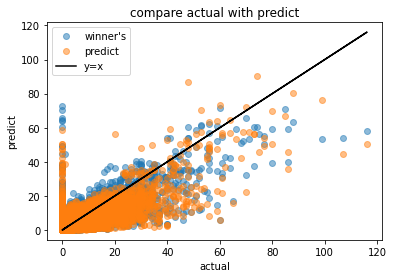

In [ ]:
plt.plot(plot_df['actual'],plot_df['winner'],'o',label= "winner's", alpha=0.5)  #winner predict
plt.plot(plot_df['actual'], plot_df['predict'],'o',label= "predict",alpha=0.5) # my predict
plt.plot(plot_df['actual'],plot_df['actual'],'k-',label="y=x"), #acutal y=x

plt.title('compare actual with predict')
plt.xlabel('actual')
plt.ylabel('predict')
plt.legend()
plt.show()

### store plot

In [ ]:
store_plot = plot_df.groupby(['d'], as_index=False).actual.sum()
tmp_plot = plot_df.groupby(['d'], as_index=False).predict.sum()
tmp2_plot = plot_df.groupby(['d'], as_index=False).winner.sum()

In [ ]:
store_plot=store_plot.merge(tmp_plot, on=['d'], how='left')
store_plot=store_plot.merge(tmp2_plot, on=['d'], how='left')

In [ ]:
for i in range(28):
  store_plot['d'][i] = int(store_plot['d'][i][2:])-1941

<ipython-input-144-ff3594df6418>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_plot['d'][i] = int(store_plot['d'][i][2:])-1941


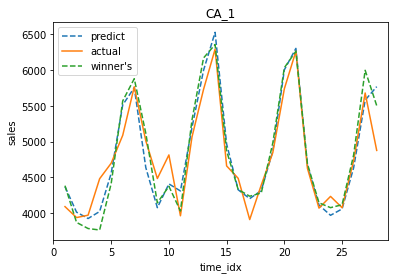

In [ ]:
plt.plot(store_plot['d'], store_plot['predict'],'--', label= "predict") # my predict
plt.plot(store_plot['d'], store_plot['actual'],label= "actual") # actual
plt.plot(store_plot['d'], store_plot['winner'],'--',label= "winner's")  #winner predict
plt.title('CA_1')
plt.xlabel('time_idx')
plt.ylabel('sales')
plt.xlim([0, 29])
plt.legend()

"""
plt.subplot(2, 1, 2) 
plt.plot(store_plot['d'], store_plot['winner'],'--',label= "winner's")  #winner predict
plt.plot(store_plot['d'], store_plot['actual'],label= "actual") # actual
plt.title("CA_1_winner's predict")
plt.xlabel('time_idx')
plt.ylabel('sales')
plt.xlim([0, 29]) 
plt.legend()
"""

#plt.figure(figsize=(16, 5))
plt.show()